In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
data=pd.read_csv('Social_Network_Ads.csv')

In [70]:
data.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [71]:
X=data.iloc[:,2:4].values

In [72]:
y=data.iloc[:,-1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [75]:
X_train=scaler.fit_transform(X_train)

In [76]:
X_test=scaler.transform(X_test)

In [77]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [78]:
k=17

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [80]:
#Training the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [81]:
y_pred=knn.predict(X_test)

In [82]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[50,  4],
       [ 4, 22]], dtype=int64)

In [85]:
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

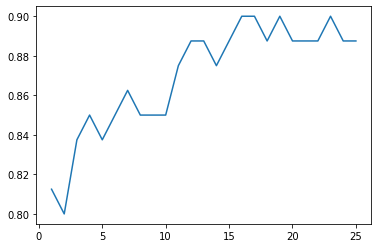

In [86]:
plt.plot(range(1,26),accuracy)

In [87]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [88]:
y_pred=knn.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred)

0.9

In [90]:
def predict_output():
    age=int(input("Enter the age: "))
    salary=int(input("Enter the salary: "))
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    if knn.predict(X_new)[0]==0:
        return "will not purchase"
    else:
        return "will purchase"

In [91]:
predict_output()

Enter the age: 52
Enter the salary: 50000


'will purchase'

In [92]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [93]:
XX,YY=np.meshgrid(a,b)

In [94]:
XX.shape

(586, 597)

In [95]:
YY.shape

(586, 597)

In [96]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

In [97]:
input_array

array([[-2.85263392, -2.53161344],
       [-2.84263392, -2.53161344],
       [-2.83263392, -2.53161344],
       ...,
       [ 3.08736608,  3.31838656],
       [ 3.09736608,  3.31838656],
       [ 3.10736608,  3.31838656]])

In [98]:
labels=knn.predict(input_array)

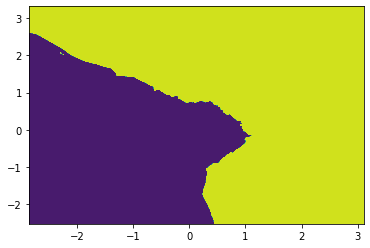

In [99]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

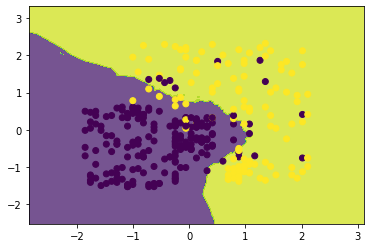

In [100]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
